# Self-Attention Model Demonstration

## Introduction

This notebook demonstrates the usage of the NLarge library for data augmentation and text classification using a self-attention model. The primary goal is to showcase how self-attention mechanisms can be leveraged to improve the performance of Natural Language Processing (NLP) tasks, specifically sentiment analysis.

The NLarge library provides various data augmentation techniques, including traditional methods like synonym replacement and random substitution, as well as advanced techniques using Large Language Models (LLMs). In this notebook, we will focus on using the self-attention mechanism to enhance the model's ability to capture contextual dependencies in the text.

We will use the `TextClassifierAttentionNetwork` class, to classify text data. The model will be trained on augmented data to demonstrate the effectiveness of data augmentation in improving model performance.

## Steps

1. **Data Augmentation**: We will augment the training data using the NLarge library to increase the diversity and robustness of the dataset.
2. **Model Initialization**: We will initialize the `TextClassifierMultiHeadAttentionNetwork` model with pretrained embeddings.
3. **Training**: The model will be trained on the augmented dataset.
4. **Evaluation**: We will evaluate the model's performance on the test dataset.


In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from NLarge.dataset_concat import augment_data, MODE
from NLarge.pipeline import TextClassificationPipeline
from NLarge.model.Attention import TextClassifierAttentionNetwork

In [2]:
original_train_data, original_test_data = datasets.load_dataset(
    "rotten_tomatoes", split=["train", "test"]
)

features = Features({"text": Value("string"), "label": Value("int64")})
original_train_data = Dataset.from_dict(
    {
        "text": original_train_data["text"],
        "label": original_train_data["label"],
    },
    features=features,
)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [3]:
# Augment and increase size by 100%
percentages = {
    MODE.RANDOM.SUBSTITUTE: 0.5,  # 50% of data for random augmentation
    MODE.SYNONYM.WORDNET: 0.5,  # 50% of data for synonym augmentation
}

augmented_data_list = augment_data(original_train_data, percentages)


# Convert augmented data into Datasets
augmented_dataset = Dataset.from_dict(
    {
        "text": [item["text"] for item in augmented_data_list],
        "label": [item["label"] for item in augmented_data_list],
    },
    features=features,
)

# Concatenate original and augmented datasets
augmented_train_data = concatenate_datasets(
    [original_train_data, augmented_dataset]
)

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 100% augmentation: {len(augmented_train_data)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Original train size: 8530
Train size after 100% augmentation: 17052


We will now train the model on the augmented dataset using the `TextClassificationPipeline` class. The augmented dataset, which combines the original training data with the augmented data, will be used to initialize the pipeline. The model, `TextClassifierAttentionNetwork`, will be trained for 10 epochs on this dataset. This training process aims to leverage the increased diversity and robustness of the augmented data to improve the model's performance on the text classification task. The training process is initiated by calling the `train_model` method on the pipeline object, specifying the number of epochs.

In [4]:
pipeline_augmented = TextClassificationPipeline(
    augmented_data=augmented_train_data,
    test_data=original_test_data,
    max_length=128,
    test_size=0.2,
    model_class=TextClassifierAttentionNetwork,
)
pipeline_augmented.train_model(n_epochs=10)

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13641 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 7/7 [00:00<00:00, 31.67it/s]


Epoch: 1/10
Train Loss: 0.673, Train Acc: 0.508
Valid Loss: 0.636, Valid Acc: 0.567


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 31.68it/s]


Epoch: 2/10
Train Loss: 0.580, Train Acc: 0.711
Valid Loss: 0.546, Valid Acc: 0.753


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 30.70it/s]


Epoch: 3/10
Train Loss: 0.510, Train Acc: 0.801
Valid Loss: 0.515, Valid Acc: 0.794


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 30.88it/s]


Epoch: 4/10
Train Loss: 0.473, Train Acc: 0.843
Valid Loss: 0.494, Valid Acc: 0.816


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 31.84it/s]


Epoch: 5/10
Train Loss: 0.446, Train Acc: 0.871
Valid Loss: 0.481, Valid Acc: 0.829


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 31.97it/s]


Epoch: 6/10
Train Loss: 0.426, Train Acc: 0.891
Valid Loss: 0.472, Valid Acc: 0.838


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 30.60it/s]


Epoch: 7/10
Train Loss: 0.411, Train Acc: 0.906
Valid Loss: 0.465, Valid Acc: 0.844


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 30.56it/s]


Epoch: 8/10
Train Loss: 0.400, Train Acc: 0.917
Valid Loss: 0.460, Valid Acc: 0.853


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 24.88it/s]


Epoch: 9/10
Train Loss: 0.391, Train Acc: 0.926
Valid Loss: 0.457, Valid Acc: 0.852


evaluating...: 100%|██████████| 7/7 [00:00<00:00, 30.42it/s]

Epoch: 10/10
Train Loss: 0.385, Train Acc: 0.932
Valid Loss: 0.454, Valid Acc: 0.854


Plotting the training and validation loss and accuracy curves will help us understand the model's performance during training. We will use the `plot_metrics` function to visualize these curves.

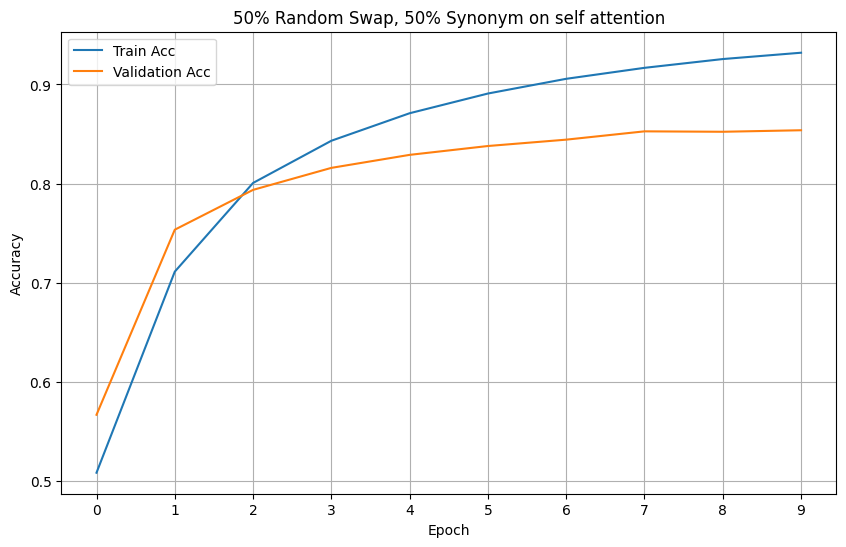

In [ ]:
pipeline_augmented.plot_acc(title="50% Random Swap, 50% Synonym on Self-Attention")